#### Extract Trend, Cyclic, Seasonal, Ir regular Component from Data set 
## Importing Libraies

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import os 
from  sklearn.metrics import r2_score 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import warnings 
warnings.filterwarnings('ignore')

### Load Data Set 

In [4]:
os.chdir('F:\\Data science batch 74\\Batch 74 Day 22\\Batch 74 Day 22')

In [5]:
df= pd.read_csv('monthly-milk-production.csv',index_col= 'Month',parse_dates = True)
display(df)

,Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


### Check Datatypes of columns 

In [6]:
display(df.dtypes)

Milk Production    float64
dtype: object

#### Moving Average 12 Months, Standard Deviation and original Data set 

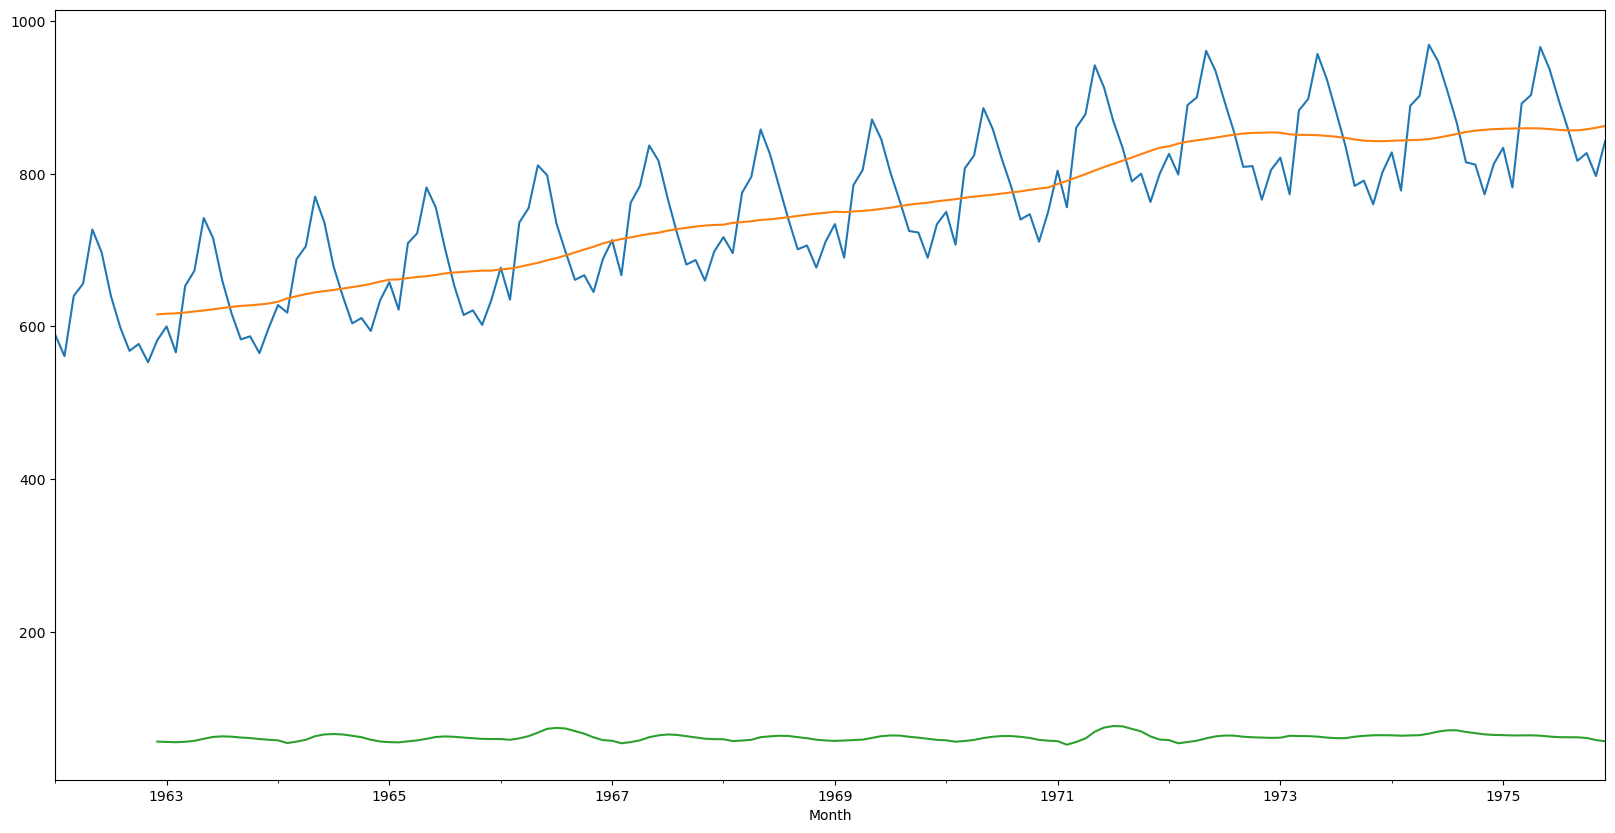

In [7]:
df['Milk Production'].plot()
df['Milk Production'].rolling(12).mean().plot()
df['Milk Production'].rolling(12).std().plot()
plt.show()

#### Seasonal Decompose  

<Figure size 2000x1000 with 0 Axes>

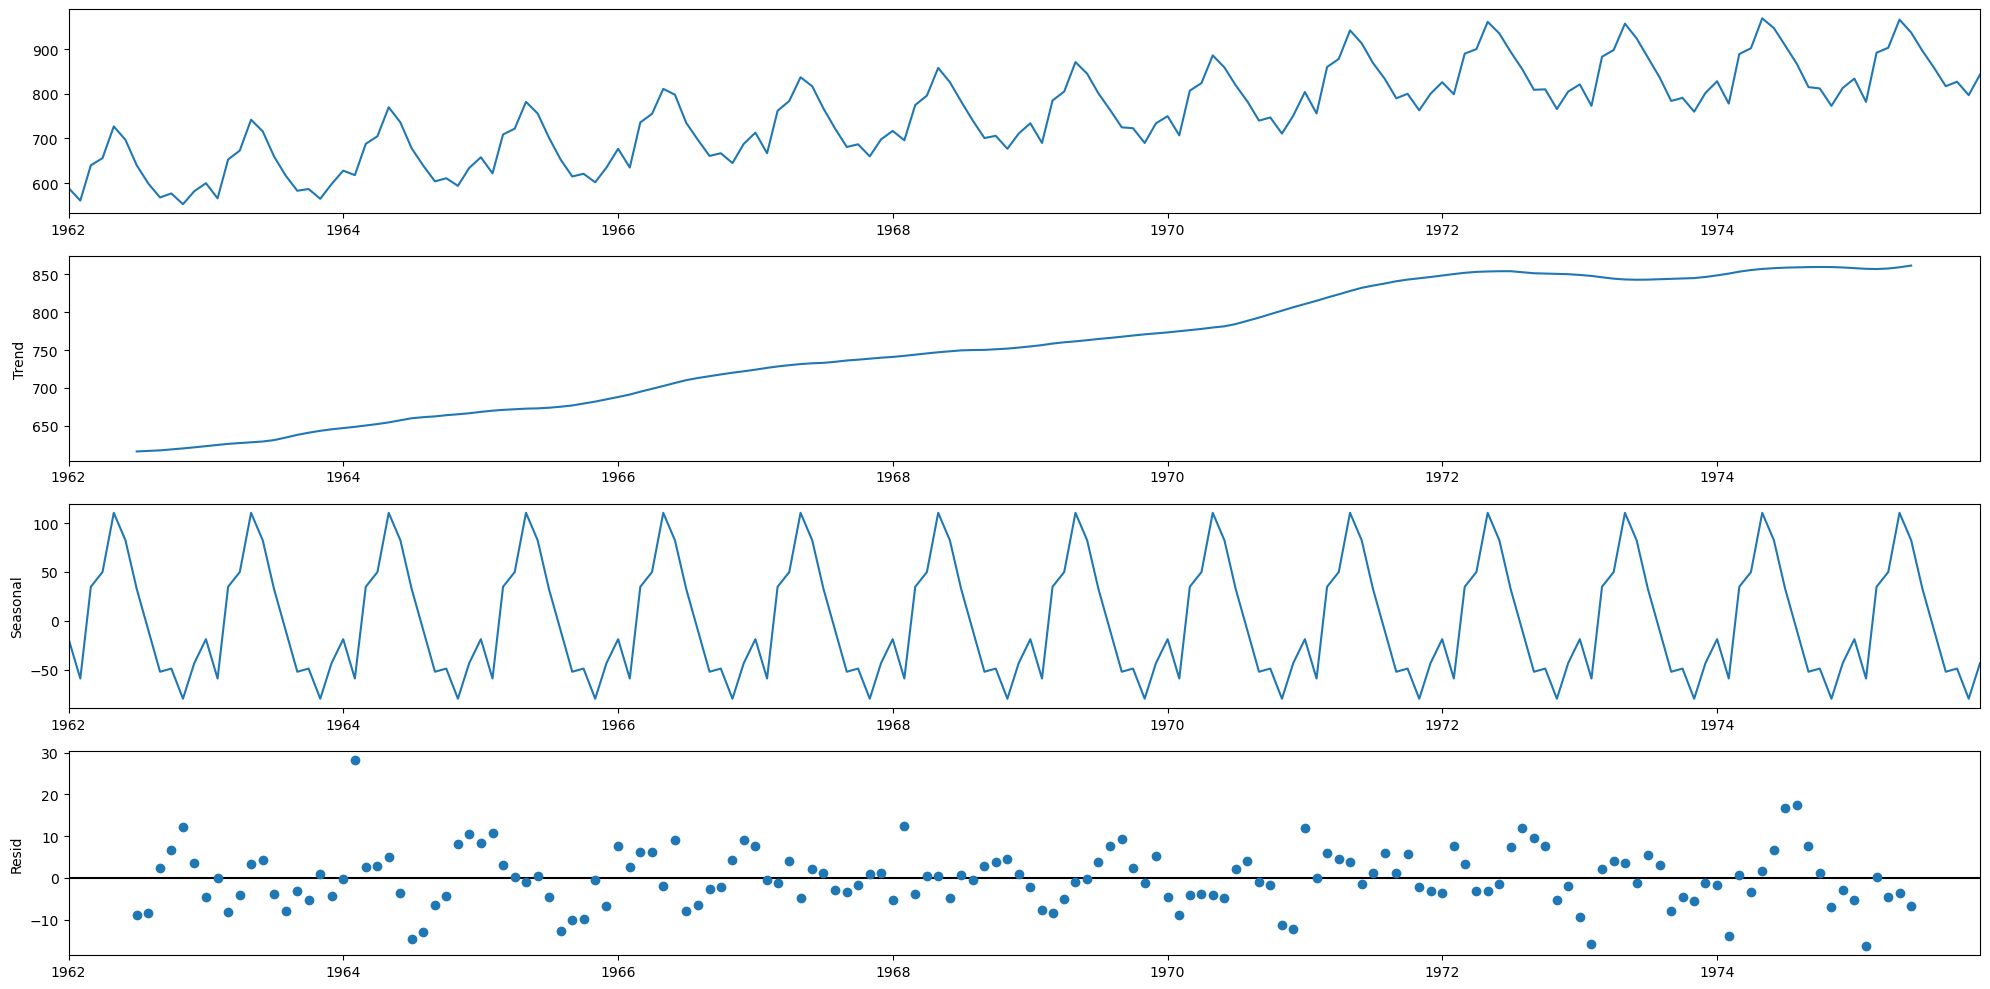

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,period=12)
fig= plt.figure()
fig=decomposition.plot()
plt.show()

### Find P, D, Q Values including seasonal P, D, Q
# m is one cycle ie 12 months , D =1 number of  shifts 


In [13]:
from statsmodels.tsa.arima.model import ARIMA 
from pmdarima import auto_arima
auto_arima(df,m=12,trace= True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1076.442, Time=2.32 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1324.708, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1092.340, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1211.922, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1452.434, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1074.582, Time=1.46 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1119.880, Time=0.50 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1076.422, Time=3.22 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1089.179, Time=1.63 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.33 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1073.351, Time=1.04 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1119.515, Time=0.34 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1075.202, Time=1.53 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1075.178, Time=1.71 sec
 ARIMA(1,0,2)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -531.033
Date:                              Thu, 06 Jul 2023   AIC                           1072.066
Time:                                      17:51:44   BIC                           1087.315
Sample:                                  01-01-1962   HQIC                          1078.260
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6062      0.905      1.775      0.076      -0.168       3.380
ar.L1          0.7310      0.084      8.737      0.000       0.567       0.895
ar.L2          0.1887      0.080      2.355      0.019       0.032       0.346
ma.S.L12      -0.6166      0.073     -8.403      0.000      -0.760      -0.473
sigma2        50.7122      4.915     10.317      0.000      41.078      60.346
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Display the shape 

In [14]:
display(df.shape)

(168, 1)

### Train Test Split 

In [15]:
train= df.iloc[:150]
test= df.iloc[150:]


### Create SARIMAX model 

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model = SARIMAX(train,order=(2,0,0),seasonal_order=(0,1,1,12))
Model= Model.fit()

### Prediction for Test Data  

In [20]:
pred= Model.predict(len(train),len(train)+len(test)-1,typ='levels')
display(pred)

1974-07-01    901.597684
1974-08-01    861.563232
1974-09-01    814.124439
1974-10-01    819.304005
1974-11-01    784.030032
1974-12-01    823.761017
1975-01-01    848.862641
1975-02-01    804.227456
1975-03-01    908.682377
1975-04-01    922.750525
1975-05-01    985.742754
1975-06-01    959.069076
1975-07-01    914.817448
1975-08-01    874.370098
1975-09-01    826.938993
1975-10-01    832.013941
1975-11-01    796.666160
1975-12-01    836.315705
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot Graph 

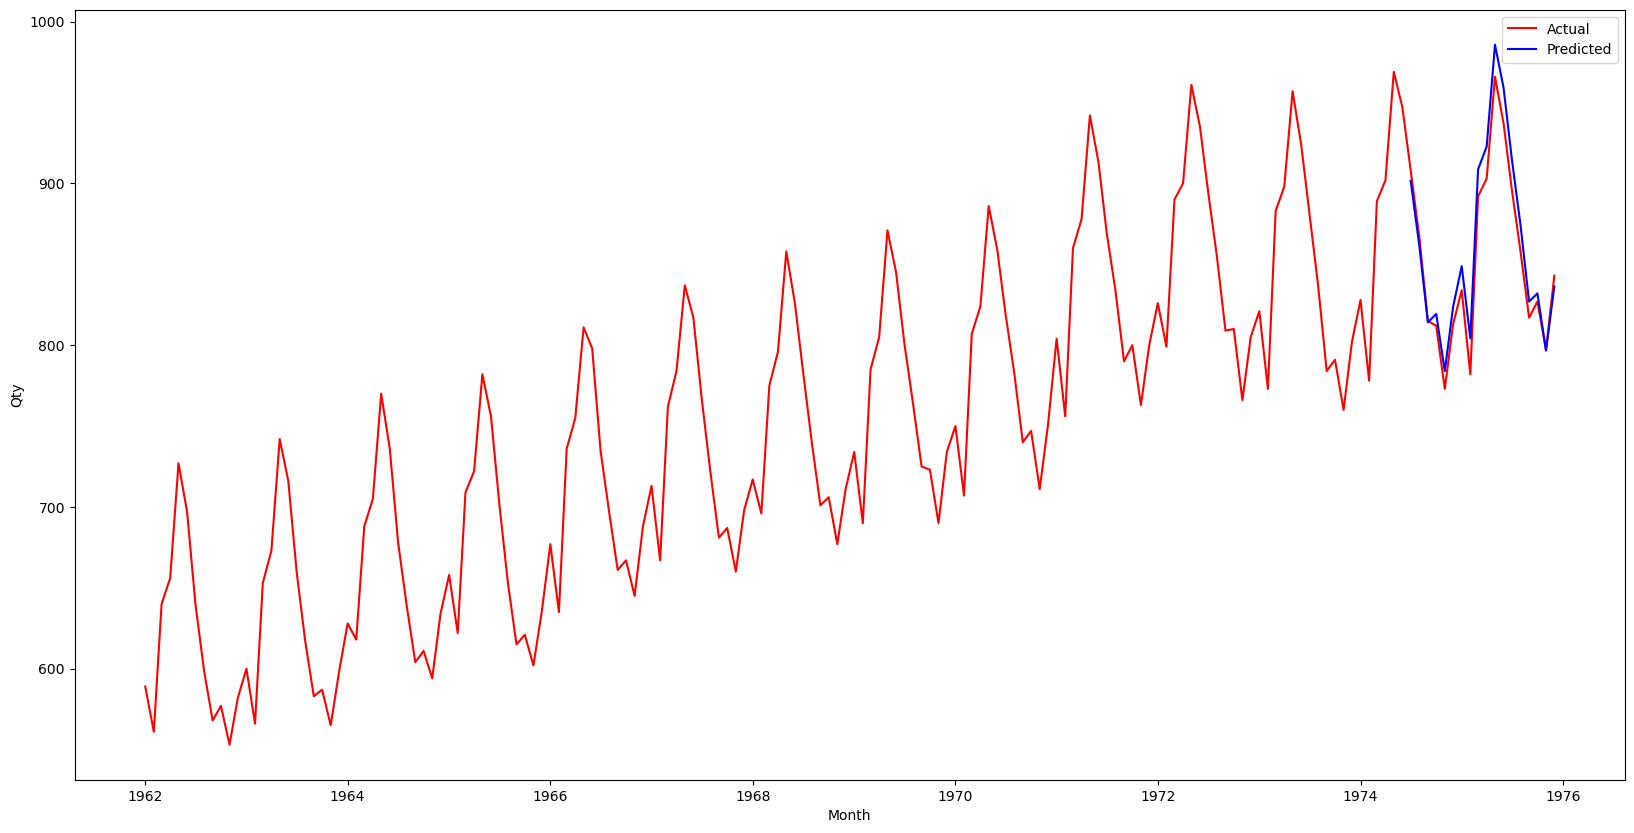

In [22]:
plt.plot(df, color = 'red', label = 'Actual')
plt.plot(pred, color = 'blue', label = 'Predicted')
plt.xlabel('Month')
plt.ylabel('Qty')
plt.legend()
plt.show()


### Accuracy of Test Data  

In [23]:
fullpred = Model.predict(12,167, typ = 'levels' )
display (fullpred)
print('Accuracy',r2_score(df[12:],fullpred))


1963-01-01    592.563273
1963-02-01    571.376401
1963-03-01    646.208387
1963-04-01    666.333238
1963-05-01    742.292516
                 ...    
1975-08-01    874.370098
1975-09-01    826.938993
1975-10-01    832.013941
1975-11-01    796.666160
1975-12-01    836.315705
Freq: MS, Name: predicted_mean, Length: 156, dtype: float64

Accuracy 0.9922875764218214


### Accuracy Full Data 


In [24]:
fpred= Model.predict(168, 191,  typ = 'levels' )
display (fpred)


1976-01-01     861.338578
1976-02-01     816.624554
1976-03-01     921.001290
1976-04-01     934.991705
1976-05-01     997.906703
1976-06-01     971.156278
1976-07-01     926.828387
1976-08-01     886.305256
1976-09-01     838.798848
1976-10-01     843.798968
1976-11-01     808.376831
1976-12-01     847.952489
1977-01-01     872.901942
1977-02-01     828.114961
1977-03-01     932.419200
1977-04-01     946.337575
1977-05-01    1009.180988
1977-06-01     982.359430
1977-07-01     937.960855
1977-08-01     897.367484
1977-09-01     849.791281
1977-10-01     854.722046
1977-11-01     819.230992
1977-12-01     858.738168
Freq: MS, Name: predicted_mean, dtype: float64

### Plot Graph for Future Data 


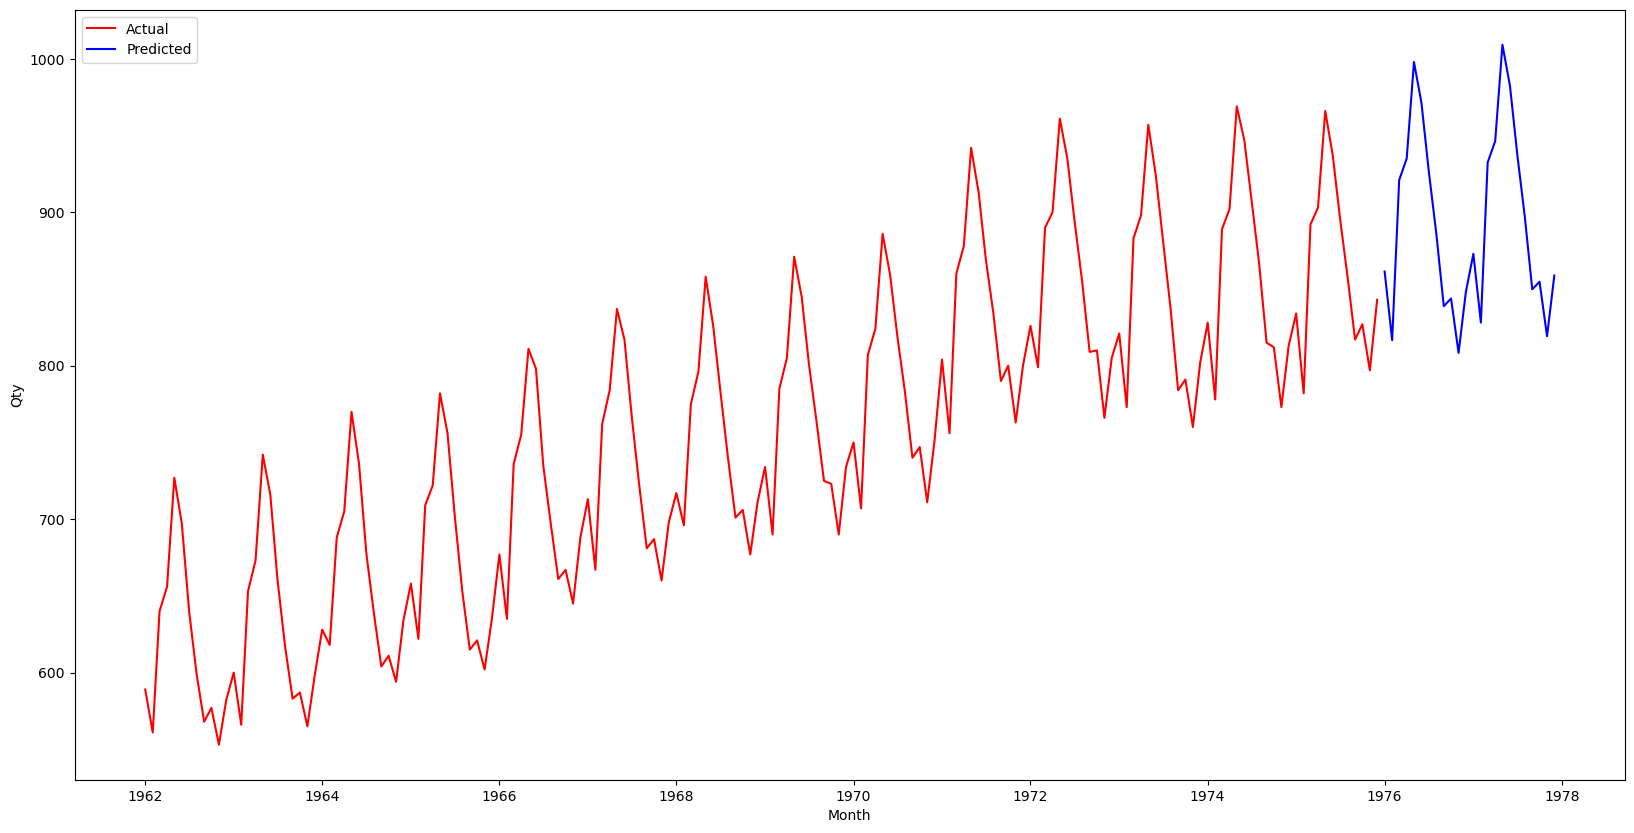

In [26]:
plt.plot(df, color = 'red', label = 'Actual')
plt.plot(fpred, color = 'blue', label = 'Predicted')
plt.xlabel('Month')
plt.ylabel('Qty')
plt.legend()
plt.show()
